# Decision Tree Proof of Concept: Customer Churn Prediction

## Overview
This notebook demonstrates a **Decision Tree classifier** applied to a synthetic customer churn dataset. The goal is to predict whether a customer will **churn** (cancel their subscription) based on features such as age, monthly spending, contract type, and support tickets.

Decision Trees are chosen for this PoC because they:
- Handle **numeric and categorical features**.
- Model **non-linear relationships**.
- Are **interpretable** and easy to visualize.

---

## Dataset
- **Samples:** 1,000 synthetic customer records
- **Columns / Features:**
  - `CustomerID` – unique identifier (not used in modeling)
  - `Age` – customer age
  - `MonthlySpend` – average monthly spend
  - `ContractType` – categorical: Month-to-Month, One-Year, Two-Year
  - `SupportTickets` – number of support interactions
- **Target:**
  - `Churn` – `"Yes"` if the customer left the service, `"No"` otherwise

**Note:** The dataset is balanced to simulate realistic churn patterns, with Month-to-Month contracts and high support tickets being more likely to churn.

---

## Modeling Steps

1. **Prepare Data**
   - Drop `CustomerID` from features
   - Split features (`X`) and target (`y`)
   - Encode categorical features (e.g., `ContractType` → 0,1,2)
   - Split into **train** and **test sets** with `stratify=y` to preserve class proportions

2. **Initialize Decision Tree**
   - Key hyperparameters:
     - `max_depth` – limit tree depth to prevent overfitting
     - `min_samples_split` / `min_samples_leaf` – control node sizes
     - `criterion` – "gini" or "entropy"
     - `random_state` – reproducibility

3. **Train the Model**
   ```python
   clf.fit(X_train, y_train)

4. **Evaluate Performance**

- **Accuracy** – overall correct predictions  
- **Confusion Matrix** – TP, TN, FP, FN breakdown  
- **Classification Report** – precision, recall, F1-score  
- **ROC AUC** – probability-based separation of classes  

---

5. **Visualize the Tree**

- **Text-based:** `export_text`  
- **Graphical:** `plot_tree`  
- Helps understand feature importance and decision rules  

---

**Key Insights**

- Decision Trees provide clear, interpretable rules for predicting churn.  
- Features like `ContractType` and `SupportTickets` are often the most influential in splitting nodes.  
- ROC AUC is a robust measure for model discrimination, especially if classes are imbalanced.


In [1]:
import pandas as pd

df = pd.read_csv("/content/decision_tree_poc_dataset_1000.csv")

print(df.head())
# dataset contains:
# customer ID
# age: age of customer from 18 to 69
# monthly spend: average monthly subscription spending
# contract type: categorical value signifying type of subscription
# support tickets: number of support interactions with customer
# churn: yes/no value, yes means customer canceled subscription while no means they stayed subscribed after support ticket filed

   CustomerID  Age  MonthlySpend    ContractType  SupportTickets Churn
0           1   56           134  Month-to-Month               2    No
1           2   69            34  Month-to-Month               1   Yes
2           3   46           138        Two-Year               2    No
3           4   32            47  Month-to-Month               1   Yes
4           5   60            58  Month-to-Month               2    No


In [3]:
# split data into features (X) and target (y)
X = df[["Age", "MonthlySpend", "ContractType", "SupportTickets"]].copy()
y = df["Churn"]

In [4]:
# before splitting into train and test sets, make sure to encode the categorical feature, ContractType to numberical values
X.loc[:, "ContractType"] = X["ContractType"].map({"Month-to-Month":0, "One-Year":1, "Two-Year":2})

In [5]:
# split into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y) # use stratify for classification to maintain balance of classes in both sets

# Understanding What Happens in a Decision Tree

A **Decision Tree** is a flowchart-like model that splits your data based on feature values to predict a target (here, `Churn`). Here's a breakdown of what happens step by step.

---

## 1. Start at the Root
- The tree starts with **all training samples in a single root node**.
- It evaluates **every feature** (`Age`, `MonthlySpend`, `ContractType`, `SupportTickets`) and every possible split point.
- It chooses the split that **best separates** the data into “pure” groups (mostly Yes or mostly No).
- Purity is measured using a **criterion**:
  - **Gini impurity**: how often a random sample would be misclassified if labeled according to class proportions.
  - **Entropy / Information gain**: reduction in uncertainty after the split.

---

## 2. Split into Child Nodes
- The chosen feature and threshold create **two child nodes**.
- Each node contains a **subset of the data**.
- The process **recursively repeats** for each child node:
  - Find the best split for that node
  - Split into new child nodes
  - Continue until a **stopping condition** is met:
    - Maximum depth reached
    - Minimum samples per node reached
    - Node is “pure” (all samples have the same class)

---

## 3. Leaf Nodes
- When a node cannot split further, it becomes a **leaf**.
- Each leaf is assigned a **class prediction**, usually the **majority class** of samples in that node.

---

## 4. Making Predictions
To predict a new sample:
1. Start at the root.
2. Follow the **splits down the tree** based on the sample’s feature values.
3. Stop at a **leaf** and return its **class** (`Yes` or `No`).

---

## 5. Intuition
- Decision Trees are like **asking a series of yes/no questions**:
  - “Is ContractType Month-to-Month?” → yes/no  
  - “Is MonthlySpend < 50?” → yes/no  
  - Continue until you reach a conclusion.
- Each split tries to **reduce uncertainty** and make the node as pure as possible.

---

## 6. Why Trees Are Powerful
- Handle **numeric and categorical features** easily.
- Can model **non-linear decision boundaries** without feature transformations.
- **Interpretable**: you can visualize the tree and understand the logic it learned.


In [6]:
# set up Decision Tree classifier

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    criterion="gini",
    random_state=1
)

# hyper parameters rundown:
# max_depth: limits how deep the tree can grow, helps prevent overfitting
# min_samples_split: min number of samples required to split an internal node, higher values max the tree less complex!
# min_samples_leaf: min number of samples required in a leaf node, prevents leaves wth very few samples which reduces overfitting!
# criterion: function used to measure quality of a split
  # common options are "gini" (default) which uses Gini impurity and "entropy" which uses information gain

In [7]:
# fit and predict using the decision tree mode
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

In [8]:
# now let's compute accuracy, confusion matrix, and classification report to see how the predictions did

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# accuracy: tells what % of correct predictions
acc = accuracy_score(y_pred, y_test) * 100
print("Accuracy: ", acc, "%")

# confusion matrix: correctly labelled datapoints are top left and bottom right (true negative, true positive)
cm = confusion_matrix(y_pred, y_test)
print("\nConfusion matrix:\n", cm)

# classification report: shows precision, recall, f1-score, and support metrics
# precision: when my model predicts label 1 for ex, how often is it right? TP / (TP + FP)
# recall: of all the actual label 1s, how many did my model correctly label as 1? TP / (TP + FN)
# f1-score: how balanced is my model of correctly labelling TP and avoiding false alarms? (2 * ((precision * recall) / (precision + recall)))
# support: number of true predictions for each class
cr = classification_report(y_pred, y_test)
print("\nClassification report:\n", cr)

Accuracy:  75.0 %

Confusion matrix:
 [[131  37]
 [ 13  19]]

Classification report:
               precision    recall  f1-score   support

          No       0.91      0.78      0.84       168
         Yes       0.34      0.59      0.43        32

    accuracy                           0.75       200
   macro avg       0.62      0.69      0.64       200
weighted avg       0.82      0.75      0.77       200



ROC-AUC score:  0.7144717261904763


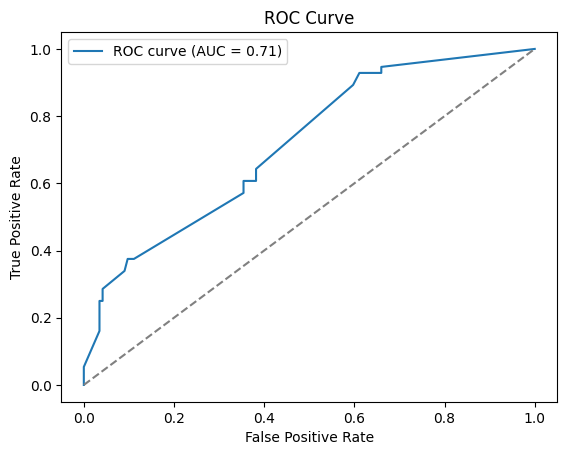

In [9]:
# let's also calculate ROC-AUC
# ROC-AUC: measures how well the model separates the two classes across all thresholds, not just the default 0.5 threshold used in class predictions

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# get positive probabilities for the positive class ("yes")
y_proba = dt.predict_proba(X_test)[:,1] # [:,1] predicts for only churn="yes"

# compute ROC-AUC
roc_auc = roc_auc_score(y_test.map({"No":0, "Yes":1}), y_proba) # make sure to map churn to 0 and 1 in y_test set
print("ROC-AUC score: ", roc_auc)
# ROC-AUC ranges from 0.5 (completely random class separation) to 1 (perfect class separation)

# let's also plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test.map({"No":0, "Yes":1}), y_proba)
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# plot explained:
# the diagonal gray line is random guessing so any model above the diaganol is better than random
# AUC (area under curve): 0.71


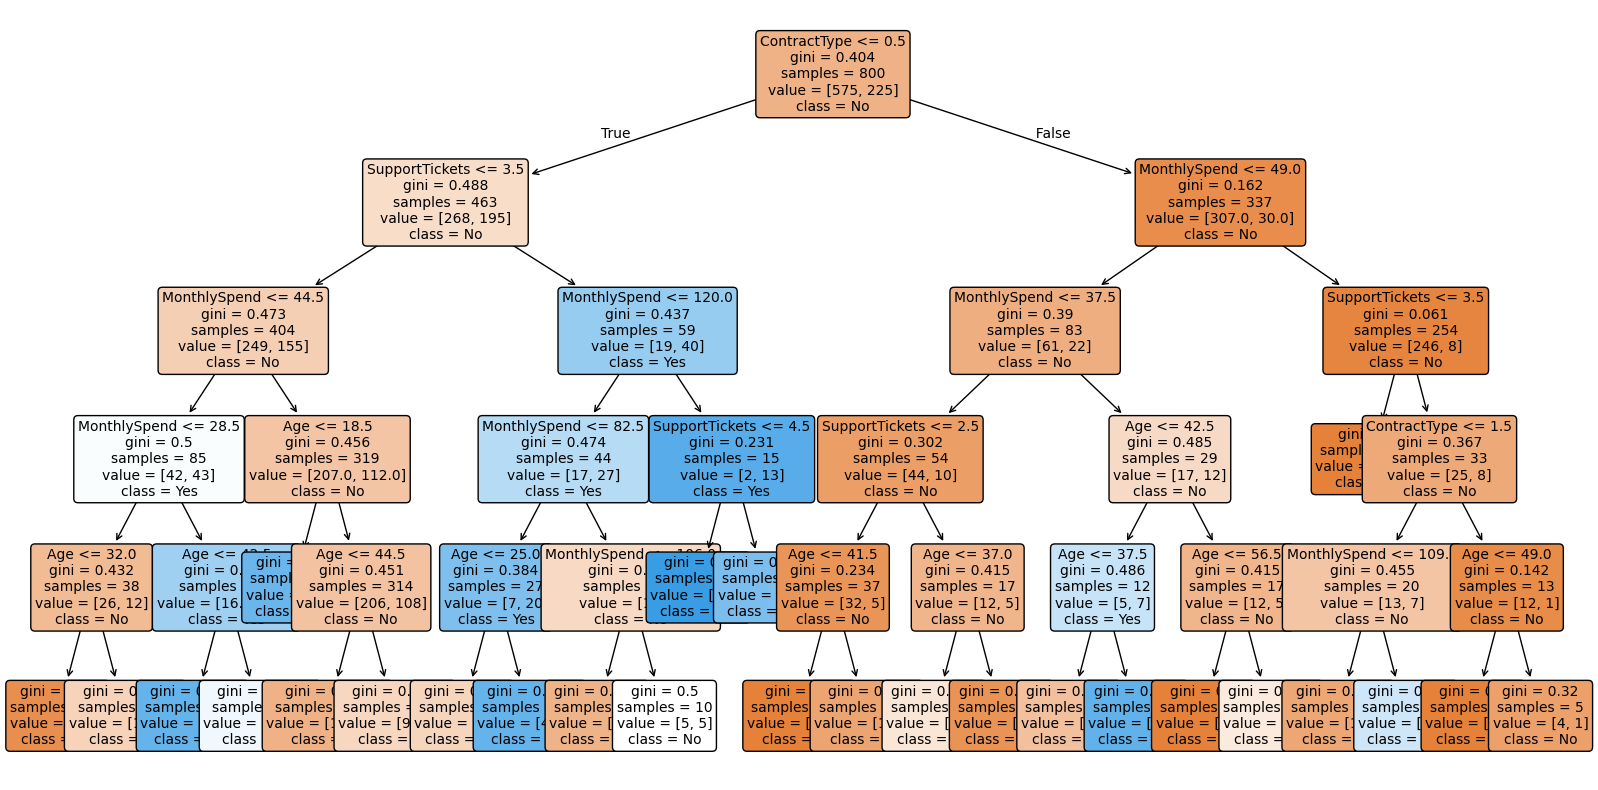

In [10]:
# now, let's graph the decision tree (very interpretable)

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(
    dt,
    feature_names=X_train.columns,
    class_names=["No","Yes"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

# shows each node of the tree and how the model made each decision to classify each data point as yes/no based on features